In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Load data
df = pd.read_csv('data/spotify-streaming-top-50-world.csv')

print('Data awal:')
df.head()

Data awal:


,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
0,2023-05-18,1,Ella Baila Sola,Eslabon Armado,89,165671,album,16,2023-04-28,False,https://i.scdn.co/image/ab67616d0000b273dfddf1...
1,2023-05-18,2,un x100to,Grupo Frontera & Bad Bunny,99,194563,single,1,2023-04-17,False,https://i.scdn.co/image/ab67616d0000b273716c0b...
2,2023-05-18,3,La Bebe - Remix,Yng Lvcas & Peso Pluma,99,234352,single,2,2023-03-17,True,https://i.scdn.co/image/ab67616d0000b273a04be3...
3,2023-05-18,4,Cupid - Twin Ver.,FIFTY FIFTY,97,174253,single,3,2023-02-24,False,https://i.scdn.co/image/ab67616d0000b27337c0b3...
4,2023-05-18,5,Flowers,Miley Cyrus,91,200600,album,13,2023-03-10,False,https://i.scdn.co/image/ab67616d0000b27358039b...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27800 entries, 0 to 27799
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             27800 non-null  datetime64[ns]
 1   position         27800 non-null  int64         
 2   song             27800 non-null  object        
 3   artist           27800 non-null  object        
 4   popularity       27800 non-null  int64         
 5   album_type       27800 non-null  object        
 6   total_tracks     27800 non-null  int64         
 7   release_date     27800 non-null  object        
 8   is_explicit      27800 non-null  bool          
 9   album_cover_url  27800 non-null  object        
 10  duration_min     27800 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 2.1+ MB


In [26]:
# cek missing values
print("Cek missing values:")
print(df.isnull().sum())

Cek missing values:
date               0
position           0
song               0
artist             0
popularity         0
duration_ms        0
album_type         0
total_tracks       0
release_date       0
is_explicit        0
album_cover_url    0
dtype: int64


In [27]:
# cek duplicate values
print("Cek duplicate values:")  
print(df.duplicated().sum())

Cek duplicate values:
0


In [34]:
# mengubah tanggal menjadi datetime
df["date"] = pd.to_datetime(df["date"])
df["release_date"] = pd.to_datetime(df["release_date"], format='ISO8601', errors='coerce')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27800 entries, 0 to 27799
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             27800 non-null  datetime64[ns]
 1   position         27800 non-null  int64         
 2   song             27800 non-null  object        
 3   artist           27800 non-null  object        
 4   popularity       27800 non-null  int64         
 5   album_type       27800 non-null  object        
 6   total_tracks     27800 non-null  int64         
 7   release_date     27800 non-null  datetime64[ns]
 8   is_explicit      27800 non-null  bool          
 9   album_cover_url  27800 non-null  object        
 10  duration_min     27800 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 2.1+ MB


Karena durasinya menggunakan detik, jadi diubah menjadi menit agar mudah untuk dibaca

In [28]:
# Membuat kolom baru 'duration_min' (konversi ms ke menit)
df['duration_min'] = df['duration_ms'] / 60000

# drop kolom duration_ms
df = df.drop(columns=['duration_ms'])

print('Tampilkan Data')
df.head()

Tampilkan Data


,date,position,song,artist,popularity,album_type,total_tracks,release_date,is_explicit,album_cover_url,duration_min
0,2023-05-18,1,Ella Baila Sola,Eslabon Armado,89,album,16,2023-04-28,False,https://i.scdn.co/image/ab67616d0000b273dfddf1...,2.761183
1,2023-05-18,2,un x100to,Grupo Frontera & Bad Bunny,99,single,1,2023-04-17,False,https://i.scdn.co/image/ab67616d0000b273716c0b...,3.242717
2,2023-05-18,3,La Bebe - Remix,Yng Lvcas & Peso Pluma,99,single,2,2023-03-17,True,https://i.scdn.co/image/ab67616d0000b273a04be3...,3.905867
3,2023-05-18,4,Cupid - Twin Ver.,FIFTY FIFTY,97,single,3,2023-02-24,False,https://i.scdn.co/image/ab67616d0000b27337c0b3...,2.904217
4,2023-05-18,5,Flowers,Miley Cyrus,91,album,13,2023-03-10,False,https://i.scdn.co/image/ab67616d0000b27358039b...,3.343333


Top 10 Artis:
artist
Taylor Swift         1871
Billie Eilish         860
Sabrina Carpenter     736
The Weeknd            674
Arctic Monkeys        548
Bad Bunny             537
KAROL G               527
Ariana Grande         487
SZA                   484
Travis Scott          473
Name: count, dtype: int64


C:\Users\Muham\AppData\Local\Temp\ipykernel_12392\3157933447.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


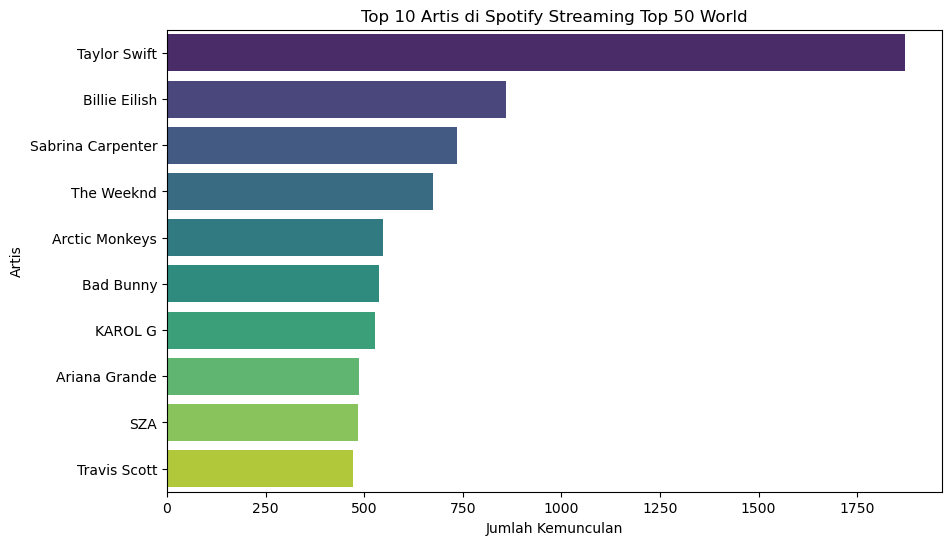

In [29]:
# Tampilkan Top 10 nama artis
top_artists = df['artist'].value_counts().head(10)
print("Top 10 Artis:")
print(top_artists)

# Visualisasi Top 10 Artis
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artis di Spotify Streaming Top 50 World')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Artis')
plt.show()

Top 10 Songs:
song
I Wanna Be Yours                                  548
Cruel Summer                                      517
One Of The Girls (with JENNIE, Lily Rose Depp)    378
As It Was                                         375
Seven (feat. Latto) (Explicit Ver.)               351
The Night We Met                                  349
Lose Control                                      324
Beautiful Things                                  308
LUNA                                              299
Starboy                                           296
Name: count, dtype: int64


C:\Users\Muham\AppData\Local\Temp\ipykernel_12392\1875956698.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs.values, y=top_songs.index, palette='magma')


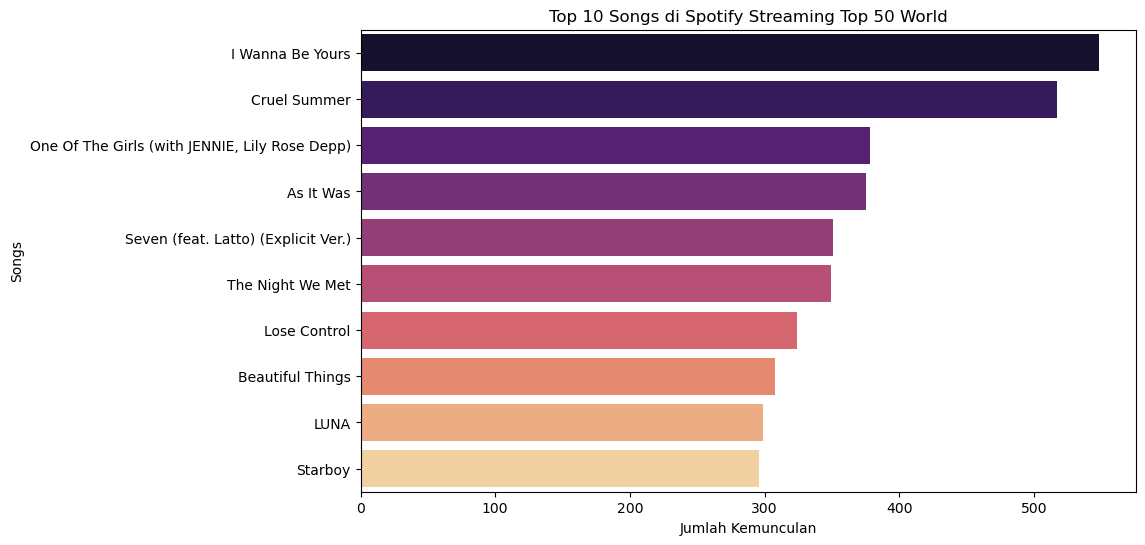

In [50]:
# Menampilkan Top 10 lagu
top_songs = df["song"].value_counts().head(10)
print("Top 10 Songs:")
print(top_songs)

# Visualisasi Top 10 Songs
plt.figure(figsize=(10,6))
sns.barplot(x=top_songs.values, y=top_songs.index, palette='magma')
plt.title('Top 10 Songs di Spotify Streaming Top 50 World')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Songs')
plt.show()

Distribusi Lagu Explicit vs Non-Explicit:
is_explicit
False    16628
True     11172
Name: count, dtype: int64


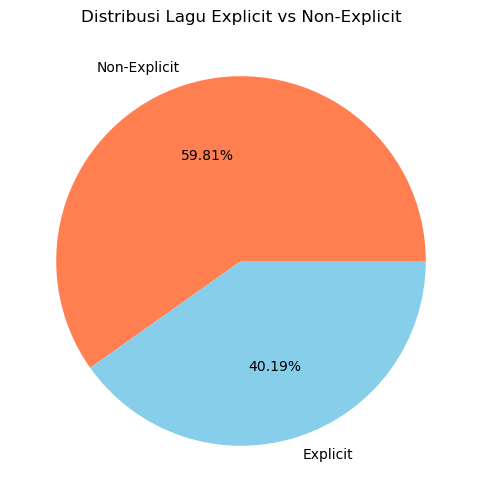

In [ ]:
# Distribusi lagu explicit vs non-explicit
explicit_counts = df['is_explicit'].value_counts()
print("Distribusi Lagu Explicit vs Non-Explicit:")
print(explicit_counts)

# Visualisasi Distribusi Lagu Explicit vs Non-Explicit
plt.figure(figsize=(6,6))
plt.pie(
    explicit_counts,
    labels=["Non-Explicit", "Explicit"],
    autopct="%.2f%%",
    colors=["coral", "skyblue"],
)
plt.title('Distribusi Lagu Explicit vs Non-Explicit')
plt.show()

In [62]:
df.head()

,date,position,song,artist,popularity,album_type,total_tracks,release_date,is_explicit,album_cover_url,duration_min
0,2023-05-18,1,Ella Baila Sola,Eslabon Armado,89,album,16,2023-04-28,False,https://i.scdn.co/image/ab67616d0000b273dfddf1...,2.761183
1,2023-05-18,2,un x100to,Grupo Frontera & Bad Bunny,99,single,1,2023-04-17,False,https://i.scdn.co/image/ab67616d0000b273716c0b...,3.242717
2,2023-05-18,3,La Bebe - Remix,Yng Lvcas & Peso Pluma,99,single,2,2023-03-17,True,https://i.scdn.co/image/ab67616d0000b273a04be3...,3.905867
3,2023-05-18,4,Cupid - Twin Ver.,FIFTY FIFTY,97,single,3,2023-02-24,False,https://i.scdn.co/image/ab67616d0000b27337c0b3...,2.904217
4,2023-05-18,5,Flowers,Miley Cyrus,91,album,13,2023-03-10,False,https://i.scdn.co/image/ab67616d0000b27358039b...,3.343333
